<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%EC%8B%A0%ED%95%9C%EC%B9%B4%EB%93%9C_%EB%8C%80%EB%B6%84%EB%A5%98_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
sh = pd.read_csv('신한카드_업종대분류 전처리완료.csv', index_col=0, encoding='utf-8')

In [6]:
sh.columns

Index(['기준년월', '광역시도명', '업종대분류', '업종중분류', '업종소분류', '신규가맹점수', '해지가맹점수',
       '매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액'],
      dtype='object')

In [7]:
sh['업종대분류'].unique()

array(['문화레져', '생활서비스', '음식', '일반유통', '전문서비스', '종합유통', '기타'], dtype=object)

In [8]:
group = sh.groupby(by='업종대분류').sum().reset_index()
group.drop(columns='기준년월', inplace=True)
group

,업종대분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,기타,0,0,298,536510655000,26429942,32630415137,431028
1,문화레져,14535,11003,604584,1460789771000,36984488,35463948311,466998863
2,생활서비스,17865,10420,1033493,12768340037000,303639697,262539862981,506748391
3,음식,66790,55072,3119542,7139967185000,299309025,13661197428,206663989
4,일반유통,22498,19775,1041532,4477134658000,67913960,161795335539,1074226743
5,전문서비스,23318,16127,1084907,8200716800000,102373719,99894242637,2407934475
6,종합유통,5107,4245,338286,13120767979000,445767635,162249411697,53835764


In [9]:
group = sh.groupby(by='업종대분류').sum().reset_index()
group.drop(columns='기준년월', inplace=True)
group

,업종대분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,기타,0,0,298,536510655000,26429942,32630415137,431028
1,문화레져,14535,11003,604584,1460789771000,36984488,35463948311,466998863
2,생활서비스,17865,10420,1033493,12768340037000,303639697,262539862981,506748391
3,음식,66790,55072,3119542,7139967185000,299309025,13661197428,206663989
4,일반유통,22498,19775,1041532,4477134658000,67913960,161795335539,1074226743
5,전문서비스,23318,16127,1084907,8200716800000,102373719,99894242637,2407934475
6,종합유통,5107,4245,338286,13120767979000,445767635,162249411697,53835764


In [10]:
group = group[group['매출가맹점수']!=0]
group = group[group['카드매출건수']!=0]

In [11]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [12]:
# 표준화 수행
cls = group.drop(columns='업종대분류')
cols = cls.columns
scaler = MinMaxScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.17622399e-01, 1.99792998e-01, 1.93728352e-01, 7.34472518e-02,
        2.51695619e-02, 7.08543670e-05, 3.21004581e-01],
       [2.67480162e-01, 1.89206856e-01, 3.31232504e-01, 9.71994538e-01,
        6.61065675e-01, 5.59805336e-03, 3.63692606e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 5.24739471e-01,
        6.50738265e-01, 0.00000000e+00, 5.94421964e-02],
       [3.36846833e-01, 3.59075392e-01, 3.33809731e-01, 3.13139179e-01,
        9.89274723e-02, 1.11775570e-03, 7.62866602e-01],
       [3.49124120e-01, 2.92834834e-01, 3.47715344e-01, 6.09031264e-01,
        1.81104104e-01, 2.93096946e-03, 1.00000000e+00],
       [7.64635424e-02, 7.70809123e-02, 1.08355743e-01, 1.00000000e+00,
        1.00000000e+00, 2.02978635e-02, 1.52743872e-01]])

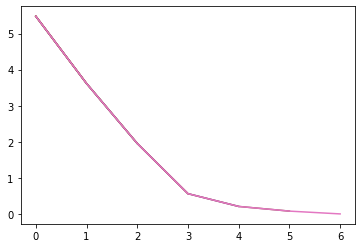

In [13]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, 8):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
  plt.show()

elbow(scaled)

In [14]:
# cluster 수는 2개로 결정
km = KMeans(n_clusters=2)
km.fit(scaled)
km.cluster_centers_

array([[0.44798123, 0.42209592, 0.47986275, 0.83224467, 0.77060131,
        0.00863197, 0.19195956],
       [0.22589834, 0.21292581, 0.21881336, 0.24890442, 0.07630028,
        0.25102989, 0.5209678 ]])

In [15]:
cluster = pd.DataFrame(km.cluster_centers_, columns=cls.columns)
cluster

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.447981,0.422096,0.479863,0.832245,0.770601,0.008632,0.191960
1,0.225898,0.212926,0.218813,0.248904,0.076300,0.251030,0.520968


In [16]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['클러스터']
predict

,클러스터
0,1
1,1
2,0
3,0
4,1
5,1
6,0


In [17]:
scaled = pd.DataFrame(data=scaled, columns=cls.columns)
scaled

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,0.217622,0.199793,0.193728,0.073447,0.025170,0.000071,0.321005
2,0.267480,0.189207,0.331233,0.971995,0.661066,0.005598,0.363693
3,1.000000,1.000000,1.000000,0.524739,0.650738,0.000000,0.059442
4,0.336847,0.359075,0.333810,0.313139,0.098927,0.001118,0.762867
5,0.349124,0.292835,0.347715,0.609031,0.181104,0.002931,1.000000
6,0.076464,0.077081,0.108356,1.000000,1.000000,0.020298,0.152744


In [18]:
names = pd.DataFrame(group['업종대분류'])
names.reset_index(inplace=True, drop=True)
names

,업종대분류
0,기타
1,문화레져
2,생활서비스
3,음식
4,일반유통
5,전문서비스
6,종합유통


In [19]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result = pd.concat([result, predict], axis=1)
result

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종대분류,클러스터
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,기타,1
1,0.217622,0.199793,0.193728,0.073447,0.025170,0.000071,0.321005,문화레져,1
2,0.267480,0.189207,0.331233,0.971995,0.661066,0.005598,0.363693,생활서비스,0
3,1.000000,1.000000,1.000000,0.524739,0.650738,0.000000,0.059442,음식,0
4,0.336847,0.359075,0.333810,0.313139,0.098927,0.001118,0.762867,일반유통,1
5,0.349124,0.292835,0.347715,0.609031,0.181104,0.002931,1.000000,전문서비스,1
6,0.076464,0.077081,0.108356,1.000000,1.000000,0.020298,0.152744,종합유통,0


In [20]:
# cluster labeling
# 0번 클러스터는 가맹점수, 매출건수가 크지만 건당,점당매출은 작은 편의점 같은 산업들이 해당된다.
# 1번 클러스터는 가맹점수, 매출건수는 작지만 건당,점당매출이 큰 유통, 전문서비스 등 음식을 제외한 산업이 해당된다.
cluster

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.447981,0.422096,0.479863,0.832245,0.770601,0.008632,0.191960
1,0.225898,0.212926,0.218813,0.248904,0.076300,0.251030,0.520968


In [21]:
def show_cluster(result, name):
  categories = cols
  color = ['skyblue', 'blue', 'salmon', 'green']

  target = result[result['업종대분류']==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='음식관련산업',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='그 외 산업',
      line_color=color[1]
  ))

  # fig.add_trace(go.Scatterpolar(
  #     r = cluster.values[2],
  #     theta = categories,
  #     fill='toself',
  #     name='비주류산업',
  #     line_color=color[2]
  # ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[3]
  ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['클러스터']),
        visible=True,
      )),
  )
  print(target['클러스터'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
show_cluster(result, '음식')

3    0
Name: 클러스터, dtype: int32


In [22]:
sh['업종대분류'].unique()

array(['문화레져', '생활서비스', '음식', '일반유통', '전문서비스', '종합유통', '기타'], dtype=object)

In [23]:
for col in sh['업종대분류'].unique():
  show_cluster(result, col)

1    1
Name: 클러스터, dtype: int32


2    0
Name: 클러스터, dtype: int32


3    0
Name: 클러스터, dtype: int32


4    1
Name: 클러스터, dtype: int32


5    1
Name: 클러스터, dtype: int32


6    0
Name: 클러스터, dtype: int32


0    1
Name: 클러스터, dtype: int32


In [24]:
sh[sh['업종대분류']=='기타']

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
1689,201903,기타,기타,자사가맹점,자사가맹점,0,0,0,0,0,0,0
3004,201903,서울,기타,자사가맹점,자사가맹점,0,0,72,51688004000,5423775,717888943,9530
3005,201903,서울,기타,해외사용,해외사용,0,0,10,34835382000,260409,3483538226,133772
4272,201903,전남,기타,자사가맹점,자사가맹점,0,0,0,0,0,0,0
7626,201909,기타,기타,자사가맹점,자사가맹점,0,0,0,0,0,0,0
8939,201909,서울,기타,자사가맹점,자사가맹점,0,0,65,41786007000,5586889,642861650,7479
8940,201909,서울,기타,해외사용,해외사용,0,0,10,34960102000,266856,3496010167,131007
10210,201909,전남,기타,자사가맹점,자사가맹점,0,0,0,0,0,0,0
13579,202003,기타,기타,자사가맹점,자사가맹점,0,0,0,0,0,0,0
14920,202003,서울,기타,자사가맹점,자사가맹점,0,0,56,34177536000,5171781,610313137,6608


In [25]:
sh[sh['업종대분류']=='종합유통']

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
319,201903,강원,종합유통,다단계판매,다단계,0,0,0,0,0,0,0
320,201903,강원,종합유통,마트/슈퍼마켓,대형마트,0,0,26,11517812000,236962,442992766,48606
321,201903,강원,종합유통,마트/슈퍼마켓,슈퍼마켓 기업형,0,0,30,1177091000,59052,39236373,19933
322,201903,강원,종합유통,마트/슈퍼마켓,슈퍼마켓 일반형,7,10,1144,9315398000,495263,8142830,18809
323,201903,강원,종합유통,면세점,면세점,0,0,2,17839000,222,8919655,80357
...,...,...,...,...,...,...,...,...,...,...,...,...
23886,202009,충북,종합유통,전용매장,보훈매장,0,0,1,386000,40,386300,9658
23887,202009,충북,종합유통,전용매장,복지매점,0,0,5,2199000,415,439877,5300
23888,202009,충북,종합유통,전용매장,사원전용매장,0,0,10,82163000,3971,8216280,20691
23889,202009,충북,종합유통,전용매장,연금매장,0,0,3,36451000,1602,12150400,22754
